<a href="https://colab.research.google.com/github/Shivamani162/2303A52344-STML/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/housing.csv'

import pandas as pd

df = pd.read_csv(file_path)
df.head()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:

import numpy as np

columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
max_likelihood_params = {}

for col in columns:
    mean = np.mean(df[col])
    variance = np.var(df[col])
    max_likelihood_params[col] = {'mean': mean, 'variance': variance}

print("Maximum Likelihood Parameters for each column:")
print(max_likelihood_params)


Maximum Likelihood Parameters for each column:
{'latitude': {'mean': 35.63186143410853, 'variance': 4.562071602892517}, 'total_rooms': {'mean': 2635.7630813953488, 'variance': 4759214.512668024}, 'housing_median_age': {'mean': 28.639486434108527, 'variance': 158.38858617035862}, 'total_bedrooms': {'mean': 537.8705525375618, 'variance': 177556.6871536956}}


In [ ]:
from scipy.stats import norm

latitude = df['latitude']
mu = np.mean(latitude)
sigma = np.std(latitude)

params = [50, 75, 80]
log_likelihoods = {}

for param in params:
    log_likelihood = np.sum(norm.logpdf(latitude, loc=param, scale=sigma))
    log_likelihoods[param] = log_likelihood

print("Log-Likelihood Values for latitude at specific parameter values:")
print(log_likelihoods)

max_likelihood = norm.logpdf(latitude, loc=mu, scale=sigma).sum()
print("\nMaximum Log-Likelihood Value for latitude:")
print(max_likelihood)


Log-Likelihood Values for latitude at specific parameter values:
{50: -511952.21343833976, 75: -3550913.612292702, 80: -4498025.423790895}

Maximum Log-Likelihood Value for latitude:
-44950.34809993984


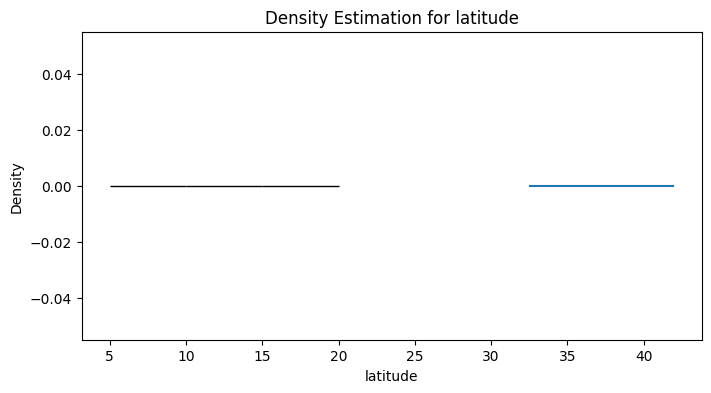

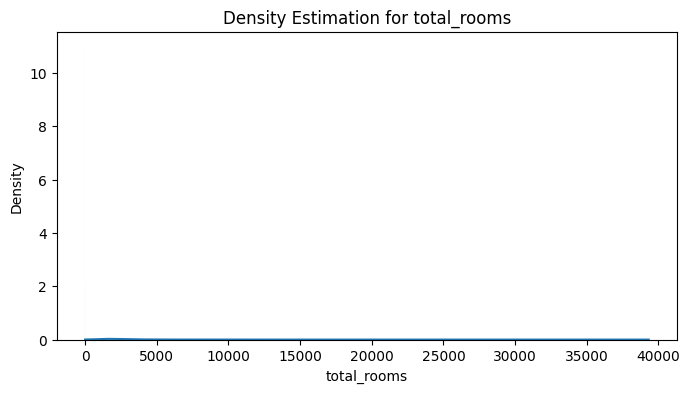

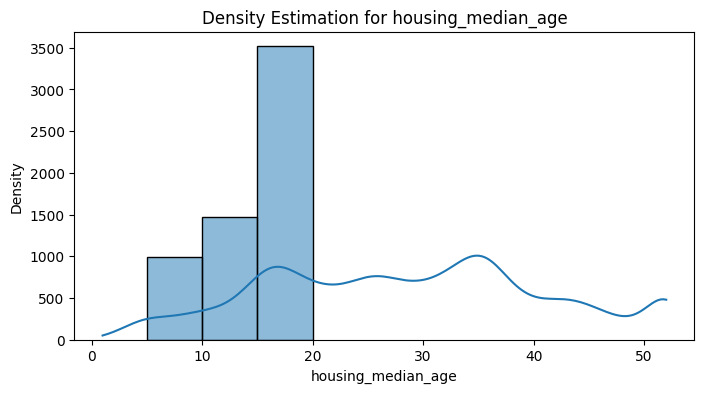

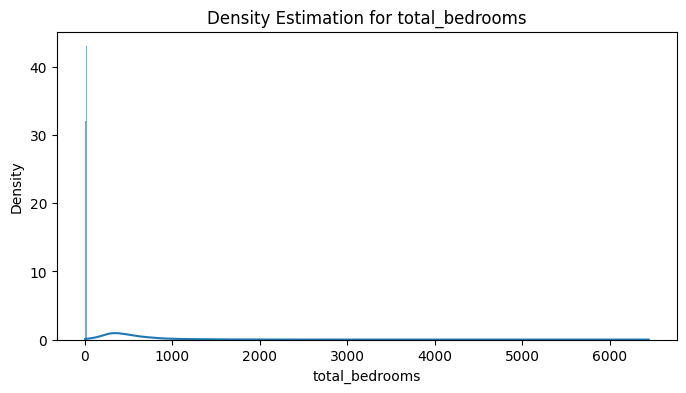

Density estimates for each column with specified bins:

latitude:
Density: [0 0 0]
Bin Edges: [ 5 10 15 20]

total_rooms:
Density: [0.02666667 0.02666667 0.14666667]
Bin Edges: [ 5 10 15 20]

housing_median_age:
Density: [0.03312145 0.04918033 0.11769823]
Bin Edges: [ 5 10 15 20]

total_bedrooms:
Density: [0.05981308 0.05981308 0.08037383]
Bin Edges: [ 5 10 15 20]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
bins = [5, 10, 15, 20]
density_estimates = {}

for col in columns:
    counts, bin_edges = np.histogram(df[col], bins=bins)

    if counts.sum() != 0:
        density = counts / (np.diff(bin_edges) * counts.sum())
    else:
        density = np.zeros_like(counts)

    density_estimates[col] = {'density': density, 'bin_edges': bin_edges}

    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=bins, kde=True)
    plt.title(f'Density Estimation for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

print("Density estimates for each column with specified bins:")
for col in density_estimates:
    print(f"\n{col}:")
    print("Density:", density_estimates[col]['density'])
    print("Bin Edges:", density_estimates[col]['bin_edges'])
